# KNeighborsClassifier 训练+分析
> 从头到尾，训练分析过一遍
- 预处理
- 全数据集训练

In [1]:
# to build and test ml model

# Common imports 
import sys

import sklearn

import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 加载mnist数据集
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# 利用预先划分好的训练集和测试集

X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# 全训练集——训练
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train,y_train)
# 训练耗时差不多1min

KNeighborsClassifier()

In [5]:
# 模型保存
import joblib
joblib.dump(kn_clf,"kn_model_all_training.pkl")
# to load
# kn_model_all_training_loaded = joblib.load("kn_model_all_training.pkl")

['kn_model_all_training.pkl']

In [6]:
# 简单的用测试集验证---训练后，个人简单验证
# 检验函数
def testour(X_test,y_test,n,model):
    some_digit=X_test[n]
    some_digit_pred = model.predict([some_digit])
    print("test result: predict:"+str(some_digit_pred)+' real: '+str(y_test[n]))
    some_digit_score=model.score([some_digit],[y_test[n]])
    print("test scores:"+str(some_digit_score))

testour(X_test,y_test,100,kn_clf)

test result: predict:['6'] real: 6
test scores:1.0


## 性能检验

In [16]:
from sklearn.model_selection import cross_val_score
# 交叉验证——比较准确率
cross_val_score(kn_clf,X_train,y_train,cv=3,scoring="accuracy")
# 全数据集交叉验证差不多56min

array([0.9676 , 0.9671 , 0.96755])

### 计算混淆矩阵|精度,召回率,f1分数

In [17]:
# 写一个简化操作的函数--------------------------------计算不同分类模型的...如上
# 导入相关函数
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
# 当前环境需要有 X_train,y_train

# 参数：model——训练好的算法模型；name——用于显示的名字；暂时固定训练集和标签数量
def calcualte_conmat_pr_rc_f1(model,name=''):
    # 计算混淆矩阵前，先要预测一轮
    y_train_pred = cross_val_predict(model,X_train,y_train,cv=3)
    # 计算混淆矩阵，并打印
    con_mat_model = confusion_matrix(y_train,y_train_pred)
    print(name+' 混淆矩阵为：')
    print(con_mat_model)
    # 计算召回率和精度
    # 美化显示的数字
    def display_cutnum(x):
        if len(x)<10:
            x = x +'0'*(10-len(x))
        else:
            x = x[:10]
        return x
    # 计算每一个，并且添加到列表里
    pr_rc_f1_list=[]
    vertical_sum = con_mat_model.sum(axis=0)
    for i in range(10):
        tp = max(con_mat_model[i])
        fp = sum(con_mat_model[i])-tp
        fn = vertical_sum[i]-tp
        pr = tp/(tp+fp)
        rc = tp/(tp+fn)
        f1 = tp/(tp+(fn+fp)/2)
        pr_rc_f1_list.append([pr,rc,f1])
    print('\n各个数字的精度，召回率和f1分数分别如下：\n')
    for i in range(10):
        num = str(i)
        pr = display_cutnum(str(pr_rc_f1_list[i][0]))
        rc = display_cutnum(str(pr_rc_f1_list[i][1]))
        f1 = display_cutnum(str(pr_rc_f1_list[i][2]))
        print('数字 '+num+' 的精度为：'+pr+' 召回率为：'+rc+' f1分数为：'+f1+'\n')
# 测试
calcualte_conmat_pr_rc_f1(kn_clf,'kn_clf')
# 跑整个训练集大概54-55min

kn_clf 混淆矩阵为：
[[5882    4    5    0    1    5   19    1    2    4]
 [   2 6705   10    2    1    1    3   11    2    5]
 [  51   60 5695   15   11    4    9   87   17    9]
 [   8   16   39 5903    1   63    4   40   33   24]
 [   3   53    1    1 5628    0   13   11    2  130]
 [  14   18    4   67    6 5211   58    7   11   25]
 [  24   13    1    0    5   27 5846    0    2    0]
 [   4   68   14    3   20    1    0 6083    3   69]
 [  25   85   15   87   35  111   26   19 5382   66]
 [  19   13    5   45   46   12    5   79   15 5710]]

各个数字的精度，召回率和f1分数分别如下：

数字 0 的精度为：0.99307783 召回率为：0.97513262 f1分数为：0.98402342

数字 1 的精度为：0.99451201 召回率为：0.95309168 f1分数为：0.97336139

数字 2 的精度为：0.95585767 召回率为：0.98376230 f1分数为：0.96960926

数字 3 的精度为：0.96281193 召回率为：0.96406990 f1分数为：0.96344050

数字 4 的精度为：0.96336870 召回率为：0.97810218 f1分数为：0.97067954

数字 5 的精度为：0.96126175 召回率为：0.95878564 f1分数为：0.96002210

数字 6 的精度为：0.98783372 召回率为：0.97710178 f1分数为：0.98243845

数字 7 的精度为：0.97094972 召回率为：0.95976648 f1分数为：0.9

### 绘制阈值与精度|召回率的曲线图

In [18]:
y_train_set = (y_train==str(5))
res = cross_val_predict(kn_clf, X_train, y_train_set, cv=3,method="predict_proba")

In [19]:
print(res)

[[0.2 0.8]
 [1.  0. ]
 [1.  0. ]
 ...
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]]


In [ ]:
# 绘制阈值与精度|召回率的曲线图--------------可选不同算法模型
# 导入所需模型
from sklearn.neighbors import KNeighborsClassifier
# 导入相关函数
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
# 当前环境要有:X_train,y_train

# 画图
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown
    plt.figure(figsize=(8, 4))                  # Not shown

# plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# plt.show()

# 画出每个数字的阈值——精度/召回率曲线
def draw_num_pr_threshold(model):
    # 先给各个数字分类
    y_train_set = []
    model_list = []
    y_scores_set = []
    pr_curve_set = []
    for i in range(10):
        y_train_set.append(y_train==str(i))
        print(y_train_set[i])
    # 模型可以直接用,无需重复训练
    for i in range(10):
        y_scores_set.append(cross_val_predict(model, X_train, y_train_set[i], cv=3,method="predict_proba"))
    for i in range(10):
        precisions, recalls, thresholds = precision_recall_curve(y_train_set[i], y_scores_set[i][:,1])
        pr_curve_set.append([precisions, recalls, thresholds])
    for i in range(10):
        print('数字 '+str(i)+' 的阈值——精度/召回率曲线图：\n')
        plot_precision_recall_vs_threshold(pr_curve_set[i][0], pr_curve_set[i][1], pr_curve_set[i][2])
        plt.show()
    return 0

draw_num_pr_threshold(kn_clf)
# 训练大概5-6min

[False  True False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False  True ... False False False]
[ True False False ...  True False False]
[False False False ... False  True False]
[False False False ... False False False]
[False False False ... False False  True]
[False False False ... False False False]


# 绘制ROC曲线
- 用来比较多个模型
- ROC分数/ROC曲线

数字 0 的ROC曲线如下,对应的ROC分数为: 0.9982419157310505



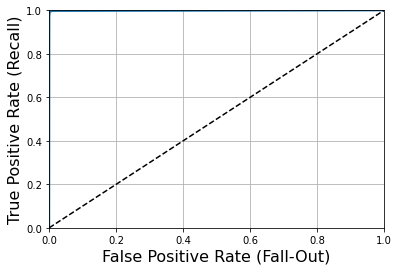

<Figure size 576x432 with 0 Axes>

数字 1 的ROC曲线如下,对应的ROC分数为: 0.9981943374800353



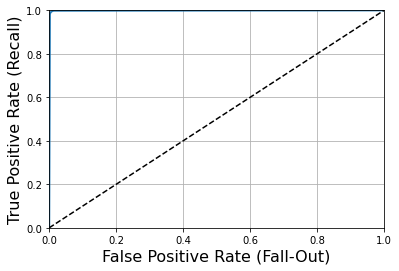

<Figure size 576x432 with 0 Axes>

数字 2 的ROC曲线如下,对应的ROC分数为: 0.9924908171020963



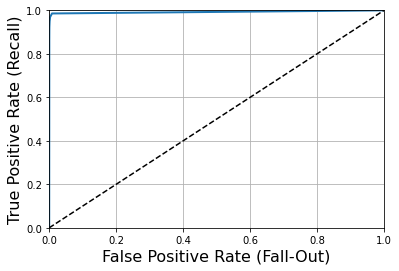

<Figure size 576x432 with 0 Axes>

数字 3 的ROC曲线如下,对应的ROC分数为: 0.9935003404887345



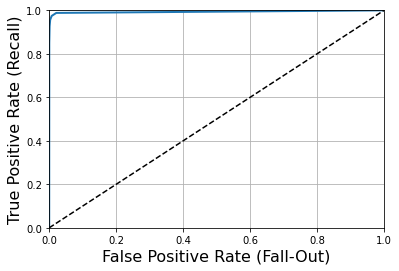

<Figure size 576x432 with 0 Axes>

数字 4 的ROC曲线如下,对应的ROC分数为: 0.994334709912578



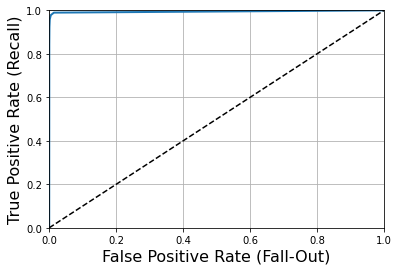

<Figure size 576x432 with 0 Axes>

数字 5 的ROC曲线如下,对应的ROC分数为: 0.9950081362508942



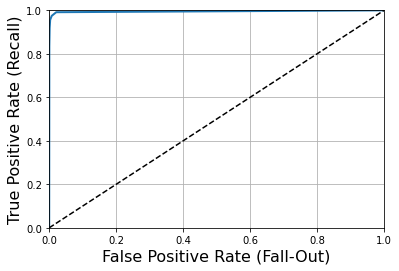

<Figure size 576x432 with 0 Axes>

数字 6 的ROC曲线如下,对应的ROC分数为: 0.9985571676239599



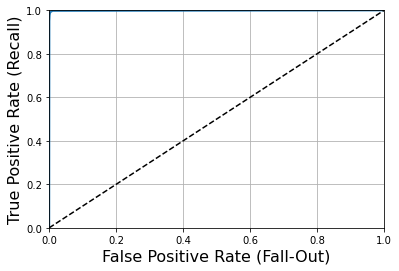

<Figure size 576x432 with 0 Axes>

数字 7 的ROC曲线如下,对应的ROC分数为: 0.9952949901719078



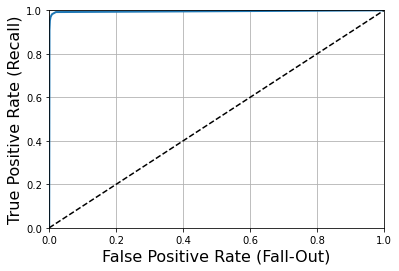

<Figure size 576x432 with 0 Axes>

数字 8 的ROC曲线如下,对应的ROC分数为: 0.9884159181115171



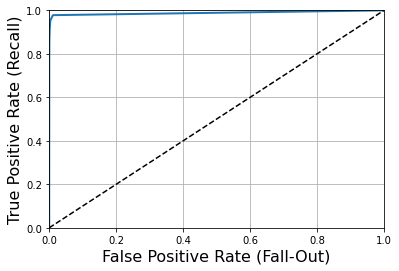

<Figure size 576x432 with 0 Axes>

数字 9 的ROC曲线如下,对应的ROC分数为: 0.9945329908702458



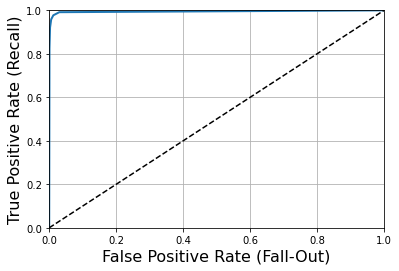

<Figure size 576x432 with 0 Axes>

In [7]:
# 写一个绘制某种model的每个数字ROC曲线的函数--------------用来比较不同的算法模型

# 导入依赖
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
# 当前环境要有:X_train,y_train

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


# 画图
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown
    plt.figure(figsize=(8, 6))                                # Not shown

def draw_model_roc(model):
    # 先给各个数字分类
    y_train_set = []
    model_list = []
    y_scores_set = []
    roc_curve_set = []
    for i in range(10):
        y_train_set.append(y_train==str(i))
    for i in range(10):
        y_scores = cross_val_predict(model, X_train, y_train_set[i], cv=3,method="predict_proba")
        y_scores_set.append(y_scores)
    for i in range(10):
        fpr, tpr, thresholds = roc_curve(y_train_set[i], y_scores_set[i][:,1])
        roc_curve_set.append([fpr, tpr, thresholds])
    for i in range(10):
        fpr = roc_curve_set[i][0]
        tpr = roc_curve_set[i][1]
        roc_score = roc_auc_score(y_train_set[i],y_scores_set[i][:,1])
        print('数字 '+str(i)+' 的ROC曲线如下,对应的ROC分数为: '+str(roc_score)+'\n')
        plot_roc_curve(fpr, tpr)
        plt.show()

draw_model_roc(kn_clf)
# kn_clf----全训练集左右,大概跑8h56min---搭配 X_train,y_train_i